# Bayesian Models

You are already familiar with Bayes' theorem:

$$
P(B|A) = \frac{P(A|B)P(B)}{P(A)}
$$​

Suppose we want to predict an event based on observations. By setting $A$ as the random variable representing the observations and $B$ as the random variable representing the event we wish to predict, we can easily use Bayes' theorem for this purpose. Machine learning models that utilize this logic are called Bayesian models. In this section, we will examine simple examples of Bayesian models.

We usually do not know the true probabilities of events. Therefore, in Bayesian models, the required probabilities are often estimated. These estimates can follow different logics. In this section, we will estimate probabilities using a frequency-based definition. The problem will be framed as follows: we have a set of previous observations along with their outcomes, and using these, we will estimate the probabilities. Then, using these estimates, we will build the Bayesian model. From this point on, we can use this model to predict future outcomes based on new observations.

Example) We want to examine the relationship between the participation rate of students in the recent semester of Discrete Mathematics and their final exam scores. Participation rate refers to the number of questions submitted as assignments during the 30-minute class. For simplicity, this number is divided by the maximum possible number. The final exam score is calculated out of 100. In this example, we aim to fit various Bayesian models and evaluate their performance to find the optimal participation threshold that allows us to predict whether a student will pass (passing is defined as a score of 50 or higher).

In [1]:
follow_rate = c(
  0.259, 0.944, 0.676, 0.148, 0.546, 0.556, 0.833, 0.87 , 0.713, 0.704, 0.019,
  0.833, 0.778, 0.667, 0.944, 0.0  , 0.796, 0.935, 0.222, 0.806, 0.704, 0.769,
  0.731, 0.602, 0.704, 0.398, 0.815, 0.528, 0.602, 0.713, 0.769, 0.935, 0.824,
  0.398, 0.898, 0.37 , 0.537, 0.944, 0.778, 0.407, 0.954, 0.87 , 0.491, 0.824,
  0.491, 0.713, 0.935, 0.38 , 0.037, 0.963, 0.63 , 0.574, 0.907, 0.0  , 0.63 ,
  0.796, 0.917, 0.481, 0.824, 0.972, 0.954, 0.861, 0.713, 0.315, 0.963, 0.935,
  0.324, 0.944, 0.778, 0.861, 0.509
)
final_grade = c(
  0.0  , 54.0 , 46.5 , 0.0  , 37.0 , 9.0  , 56.5 , 42.3 , 70.5 , 76.5 , 0.0  ,
  37.5 , 57.5 , 62.0 , 87.5 , 0.0  , 94.5 , 75.6 , 14.5 , 41.1 , 91.5 , 90.5 ,
  73.0 , 68.0 , 52.0 , 19.5 , 65.5 , 51.0 , 64.0 , 39.0 , 79.3 , 66.0 , 69.5 ,
  33.8 , 44.5 , 51.9 , 38.8 , 52.2 , 45.0 , 66.5 , 64.5 , 56.7 , 0.0  , 87.0 ,
  27.5 , 63.7 , 49.0 , 16.2 , 0.0  , 84.2 , 53.5 , 80.5 , 37.5 , 0.0  , 87.5 ,
  56.0 , 74.5 , 85.5 , 70.0 , 88.5 , 69.5 , 83.8 , 61.5 , 32.0 , 65.5 , 78.0 ,
  47.5 , 73.0 , 79.2 , 76.0 , 0.0
)
history = data.frame(follow_rate, final_grade)
head(history)

,follow_rate,final_grade
,<dbl>,<dbl>
1,0.259,0.0
2,0.944,54.0
3,0.676,46.5
4,0.148,0.0
5,0.546,37.0
6,0.556,9.0


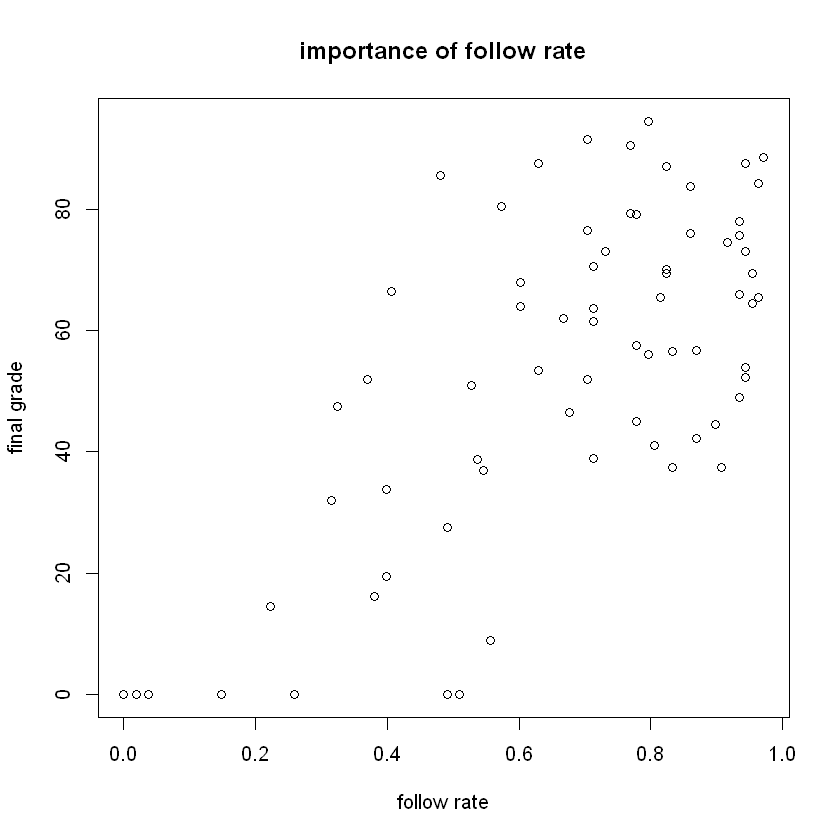

In [2]:
plot(follow_rate, final_grade, main="importance of follow rate", xlab="follow rate", ylab="final grade")

First, assume that the threshold we are looking for is 0.5. We need to construct a Bayesian model based on this threshold. After building the Bayesian model, we will try to make it flexible enough to work with different thresholds.

In [3]:
threshold = 0.5

In the final grades column, we are only concerned with whether a passing grade has been achieved, and the exact score is not needed. Therefore, we can convert this dataset into a binary format. Similarly, in the participation rate column, it is only important that the participation rate is not below the desired threshold.

In [4]:
binary_history = data.frame(follow_rate >= threshold, final_grade >= 50)
colnames(binary_history) <- c("followed","passed")
head(binary_history)

,followed,passed
,<lgl>,<lgl>
1,FALSE,FALSE
2,TRUE,TRUE
3,TRUE,FALSE
4,FALSE,FALSE
5,TRUE,FALSE
6,TRUE,FALSE


Now, we will calculate the required probabilities for the Bayesian model. For this, we will use the classical definition of probability based on the observations in the binary_history.

In [5]:
P_followed = sum(binary_history$followed) / length(binary_history$followed)
P_passed = sum(binary_history$passed) / length(binary_history$passed)

P_followed_if_passed =
  sum(binary_history[binary_history$passed == 1, ]$followed) /
  sum(binary_history$passed)

P_followed_if_not_passed =
  sum(binary_history[binary_history$passed == 0, ]$followed) /
  length(binary_history[binary_history$passed == 0, ]$followed)

In [6]:
P_passed_if_followed = P_followed_if_passed * P_passed / P_followed
P_not_passed_if_followed = P_followed_if_not_passed * (1-P_passed) / P_followed
P_passed_if_not_followed = (1-P_followed_if_passed) * P_passed / (1-P_followed)
P_not_passed_if_not_followed = (1-P_followed_if_not_passed)*(1-P_passed) /(1-P_followed)

So, if a person has participated more than 50% in the class, we can predict their passing based on the following results:

In [7]:
cat("If we have a following student:\n")
cat("Probability of passing:", P_passed_if_followed, "\n")
cat("Probability of failing:", P_not_passed_if_followed, "\n")

If we have a following student:
Probability of passing: 0.7592593 
Probability of failing: 0.2407407 


Also, if a student has participated less than 50%, we can predict their failure based on the following results:

In [8]:
cat("If we have a not following student:\n")
cat("Probability of passing:", P_passed_if_not_followed, "\n")
cat("Probability of no passing:", P_not_passed_if_not_followed, "\n")

If we have a not following student:
Probability of passing: 0.1764706 
Probability of no passing: 0.8235294 


Next, we will attempt to prepare a function to perform the above calculations.

In [9]:
# Inputs:
#    observations: a data.frame such as history containing two columns:
#                 1. column y: what we want to predict in future.
#                 2. column x: what we want to predict based on.
#    x: name of column x in observations
#    y: name of column y in observations
#    situation: x value of new situation that we want to predict the
#              corresponding y
#
# The function assumes that x and y are just 0 or 1.
#
# Output of function determines that the corresponding y for the input
# situation, whether it is equal to 1 or not.

# `nrow()` function returns number of rows in the input dataframe.
bayes_prediction = function(situation, observations, x, y) {
  P_x = sum(observations[x]) / nrow(history)
  P_y = sum(observations[y]) / nrow(history)
  P_x_if_y = sum(observations[observations[y] == 1, ][x]) /
             sum(observations[y])
  P_x_if_not_y = sum(observations[observations[y] == 0, ][x]) /
                 nrow(observations[observations[y] == 0, ])
  if (situation == 1) {
    P_true = P_x_if_y * P_y / P_x
    P_false = P_x_if_not_y * (1-P_y) / P_x
    return (P_true > P_false)
  } else {
    P_true = (1-P_x_if_y) * P_y / (1-P_x)
    P_false = (1-P_x_if_not_y) * (1-P_y) / (1-P_x)
    return (P_true > P_false)
  }
}

bayes_prediction(1, binary_history, x = "followed", y = "passed")
bayes_prediction(0, binary_history, x = "followed", y = "passed")

[1] TRUE

[1] FALSE

If we focus more on how Bayesian models work, we see that their predictions are based on comparing the probabilities of outcomes under specific conditions. For each prediction, Bayes' theorem is used to calculate the probability for each possible outcome, and the outcome with the highest probability is considered the prediction. Therefore, in each prediction, the denominator in Bayes' equation is the same for all probability calculations (since we are predicting for a specific observation, the factor related to that particular event is the same in all possible cases). As a result, since only the comparison of these values is important to us, we can simply ignore this factor in the calculations.

Problems like the ones above, where we aim to choose one option among several using given information, are called classification problems. Models like the one above that solve these problems are called classifiers. Each possible answer in these problems is referred to as a class. In the problem above, there were two classes: pass or fail in the final exam. Classification problems can have more than two classes. Extending the model above to predict between more classes is straightforward. We just need to calculate more probabilities using Bayes' theorem. It might be useful to divide the final grade into three ranges in the problem above, and modify the question and solution for this case as well.

Random variables like the participation rate in the recent problem, which are used for predictions, are called predictors or features. The problem above had only one predictor variable, but there can be many more. Also, in the problem above, we considered the predictor variable as binary. However, this variable can have a greater variety of values or even continuous values, which we will examine in the future.

Now, we address the main problem, which is finding the minimum participation rate at which the Bayesian model predicts a passing grade. To do this, we first prepare a function that, by receiving the participation threshold, converts the participation data into binary format.

In [10]:
history_to_binary = function(history, threshold) {
    binary_history = data.frame(
      history$follow_rate >= threshold,
      history$final_grade >= 50
    )
    colnames(binary_history) <- c("followed","passed")
    return (binary_history)
}

head(history_to_binary(history, 0.3))

,followed,passed
,<lgl>,<lgl>
1,FALSE,FALSE
2,TRUE,TRUE
3,TRUE,FALSE
4,FALSE,FALSE
5,TRUE,FALSE
6,TRUE,FALSE


Thus, by combining the two functions above, we can make predictions with different thresholds.

In [11]:
cat("If someone has less than 70% contribution, they probably will pass:",
  bayes_prediction(
    0, history_to_binary(history, 0.7),
    x = "followed", y = "passed"
  )
)

cat("\nIf someone has less than 80% contribution, they probably will pass:",
  bayes_prediction(
    0, history_to_binary(history, 0.8),
    x = "followed", y = "passed"
  )
)

If someone has less than 70% contribution, they probably will pass: FALSE
If someone has less than 80% contribution, they probably will pass: TRUE

Now, we need to find a threshold that results in predictions most aligned with our current observations. For this, we need a function that calculates the degree of this alignment:

In [12]:
accuracy = function(binary_history) {
    matchs_no = 0
    for (row in 1:nrow(binary_history)) {
        followed = binary_history[row, "followed"]
        passed = binary_history[row, "passed"]

        prediction = bayes_prediction(followed, binary_history, x = "followed", y = "passed")
        matchs_no = matchs_no + (prediction == passed)
    }
    return (matchs_no/nrow(binary_history))
}

cat("accuracy of threshold = 0.5 is", accuracy(history_to_binary(history, 0.5)))

accuracy of threshold = 0.5 is 0.7746479

Now, by executing a loop over different participation thresholds, we will find the optimal threshold at which predictions have the greatest alignment with our data. We will set the precision of this search to 0.01.

In [13]:
best_accuracy = -1
best_threshold = -1

for (thr in 0:100) {
  threshold = 0.01 * thr
  acc = accuracy(history_to_binary(history, threshold))
  if (acc > best_accuracy) {
    best_accuracy = acc
    best_threshold = threshold
  }
}

cat(
  "The best accuracy is", best_accuracy,
  "corresponding to the threshold", best_threshold
)

The best accuracy is 0.8169014 corresponding to the threshold 0.56